## Classification using vertebrate data set

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
data = pd.read_csv('data/vertebrate/data.csv')

In [3]:
data.head()

,Name,Body Temperature,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class Label
0,human,warm-blooded,hair,yes,no,no,yes,no,mammal
1,python,cold-blooded,scales,no,no,no,no,yes,reptile
2,salmon,cold-blooded,scales,no,yes,no,no,no,fish
3,whale,warm-blooded,hair,yes,yes,no,no,no,mammal
4,frog,cold-blooded,none,no,semi,no,yes,yes,amphibian


In [4]:
# List of all classes
data['Class Label']

0        mammal
1       reptile
2          fish
3        mammal
4     amphibian
5       reptile
6        mammal
7          bird
8        mammal
9          fish
10      reptile
11         bird
12       mammal
13         fish
14    amphibian
Name: Class Label, dtype: object

In [5]:
# List of unique classes
data['Class Label'].unique()

array(['mammal', 'reptile', 'fish', 'amphibian', 'bird'], dtype=object)

In [6]:
# Number of entries for each unique classes
data.groupby('Class Label').apply(lambda x: len(x))

Class Label
amphibian      2
bird           2
fish           3
mammal         5
reptile        3
dtype: int64

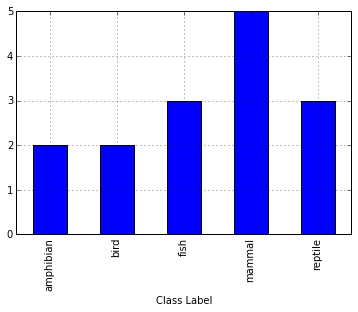

In [7]:
# Plot bar chart based on Class Label
data.groupby('Class Label').apply(lambda x: len(x)).plot(kind='bar')

In [8]:
# X = data.as_matrix(columns=['Name', 'Body Temperature', 'Skin Cover', 'Gives Birth', 'Aquatic Creature', 'Aerial Creature', 'Has Legs', 'Hibernates'])
# Y = data.as_matrix(columns=['Class Label'])

# X = data.values[:,:-1]
# Y = data.values[:,-1]
Y = np.array([4, 5, 3, 4, 1, 5, 4, 2, 4, 3, 5, 2, 4, 3, 1])

In [9]:
from sklearn import tree
from sklearn.feature_extraction import DictVectorizer

In [10]:
cols_to_retain = ['Name', 'Body Temperature', 'Skin Cover', 'Gives Birth', 'Aquatic Creature', 'Aerial Creature', 'Has Legs', 'Hibernates']
X_feature = data[cols_to_retain]
X_dict = X_feature.T.to_dict().values()

In [11]:
#X1 = [dict(enumerate(X)) for sample in X]
# turn list of dicts into a numpy array
vect = DictVectorizer(sparse=False)
X_int = vect.fit_transform(X_dict)

In [12]:
#Y_label = data['Class Label']
#Y

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_int,Y)